In [4]:
full_path = '/user/simon/data/soar/work/aeon/2019-08-06_rachel/RED/cfsto_0180_OGLE-2019-BLG-0747_obs1-07-08-2019.fits'

from ccdproc import CCDData

ccd = CCDData.read(full_path, unit='adu')

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


module://ipykernel.pylab.backend_inline


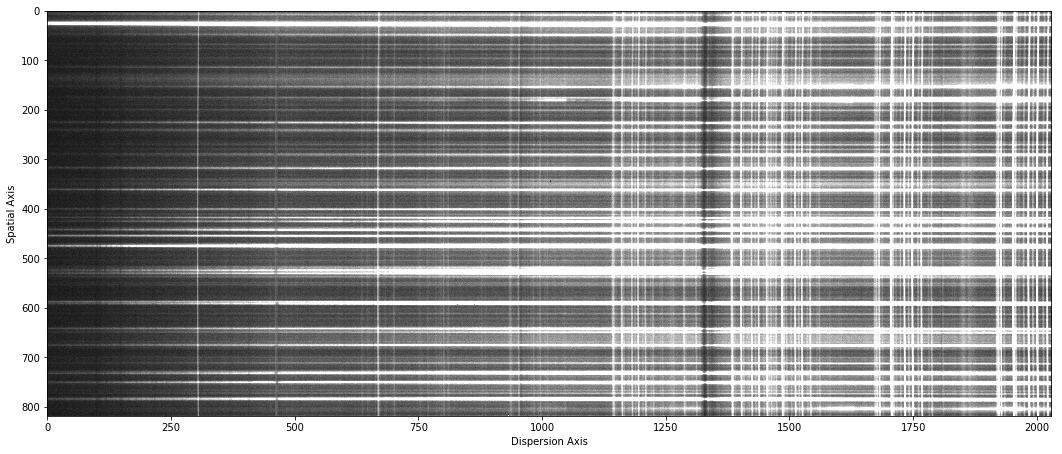

In [5]:
import matplotlib
print(matplotlib.rcParams['backend'])
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,10))

ax.imshow(ccd.data, cmap='gray', clim=(0, 500))
ax.set_xlabel("Dispersion Axis")
ax.set_ylabel("Spatial Axis")
plt.show()

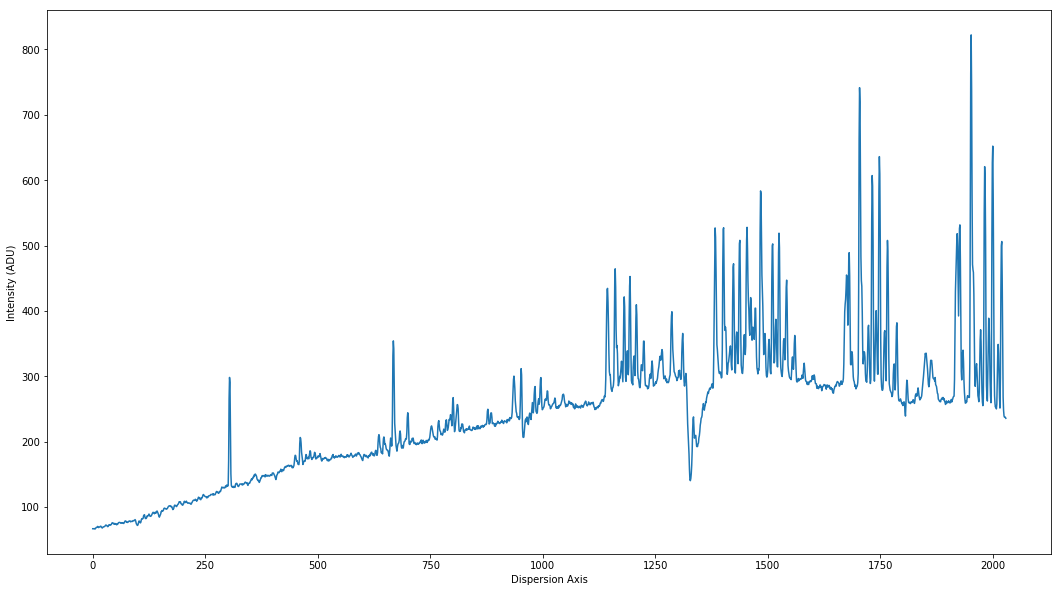

In [6]:
import numpy as np

median = np.median(ccd.data, axis=0)

fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(median)
ax.set_xlabel("Dispersion Axis")
ax.set_ylabel("Intensity (ADU)")
plt.show()

In [8]:
median_subtracted = ccd.data - median[:None]

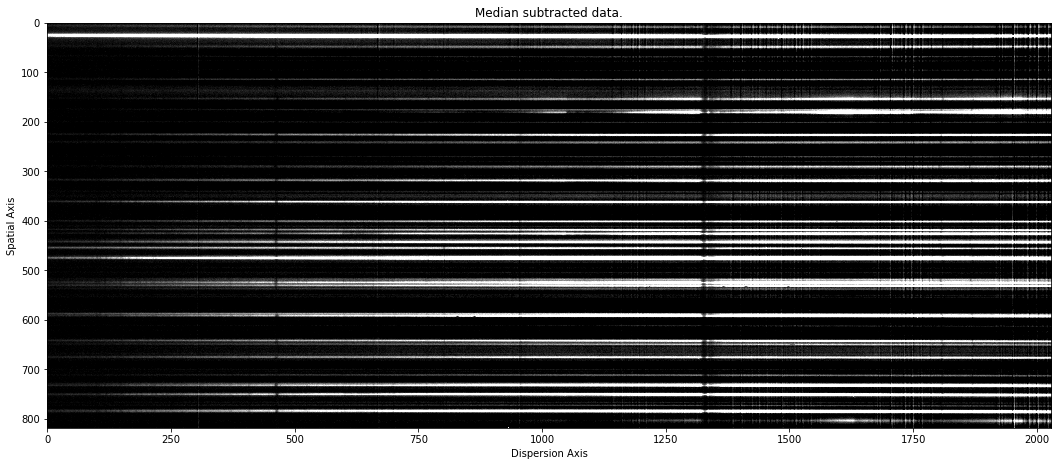

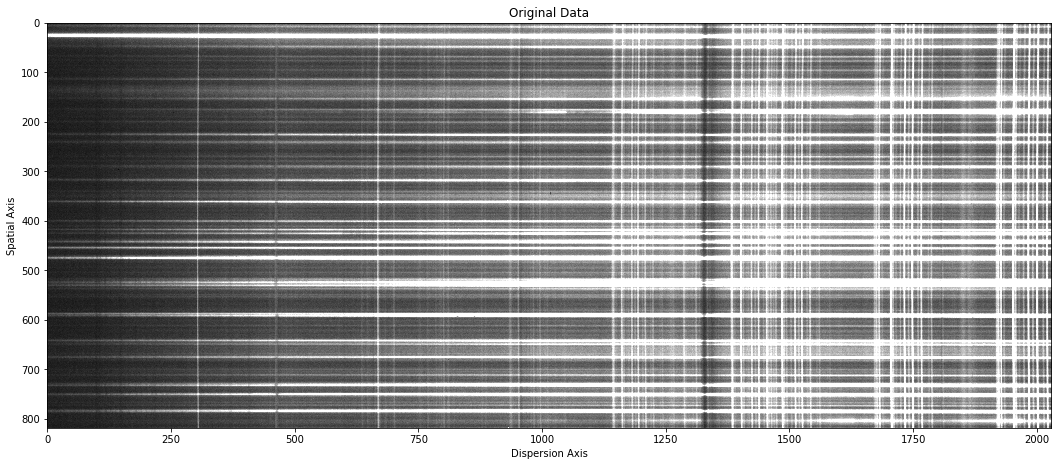

In [45]:
fig, ax = plt.subplots(figsize=(18,10))
ax.imshow(median_subtracted, cmap='gray', clim=(0, 500))
ax.set_title("Median subtracted data.")
ax.set_xlabel("Dispersion Axis")
ax.set_ylabel("Spatial Axis")
plt.show()

fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(ccd.data, cmap='gray', clim=(0, 500))
ax.set_title('Original Data')
ax.set_xlabel("Dispersion Axis")
ax.set_ylabel("Spatial Axis")
plt.show()

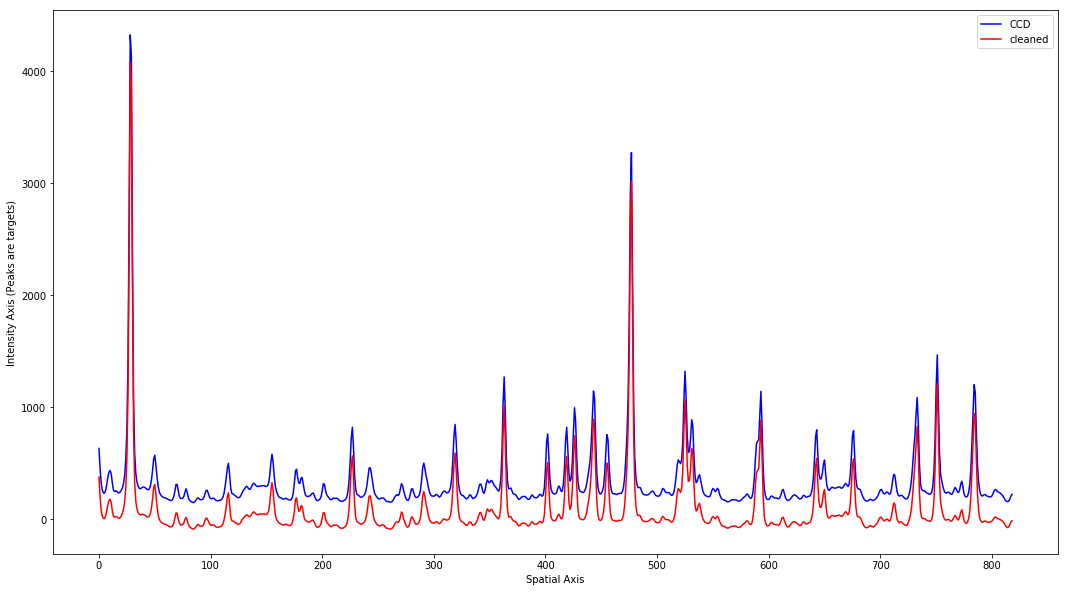

In [10]:
ccd_spatial_median = np.median(ccd.data, axis=1)
cleaned_spatial_median = np.median(median_subtracted, axis=1)

fig,ax = plt.subplots(figsize=(18, 10))

ax.plot(ccd_spatial_median, color='b', label='CCD')
ax.plot(cleaned_spatial_median, color='r', label='cleaned')
ax.set_xlabel("Spatial Axis")
ax.set_ylabel("Intensity Axis (Peaks are targets)")
plt.legend(loc='best')
plt.show()

In [11]:
import goodman_pipeline
print(goodman_pipeline.__version__)

[10:49:03][I]: Starting Goodman HTS Pipeline Log
[10:49:03][I]: Local Time    : 2019-08-21 10:49:03.355759
[10:49:03][I]: Universal Time: 2019-08-21 14:49:03.356640
[10:49:06][I]: Pipeline Version: 1.2.1 (latest)


1.2.1


In [12]:
from goodman_pipeline.core import identify_targets

copy_ccd = ccd.copy()
copy_ccd.data = median_subtracted
identified_targets = identify_targets(ccd=copy_ccd, fit_model='gaussian', background_threshold=1, nfind=30, plots=False)


[10:49:06][I]: Searching spectroscopic targets in file: cfsto_0180_OGLE-2019-BLG-0747_obs1-07-08-2019.fits
[10:49:06][I]: Fitting Linear1D model to spatial profile to detect background shape
[10:49:06][I]: Subtracting background shape and level spatial profile for better target identification
[10:49:06][I]: Finding all peaks in spatial profile
[10:49:06][I]: Selecting the 30 most intense peaks out of 29 found
[10:49:06][I]: Validating peaks by setting threshold 1 times the background level 329.96
[10:49:06][I]: Selecting peak: Centered: 28.0 Intensity 4100.862
[10:49:06][I]: Selecting peak: Centered: 477.0 Intensity 3036.127
[10:49:06][I]: Selecting peak: Centered: 751.0 Intensity 1226.917
[10:49:06][I]: Selecting peak: Centered: 525.0 Intensity 1083.402
[10:49:06][I]: Selecting peak: Centered: 363.0 Intensity 1034.415
[10:49:06][I]: Selecting peak: Centered: 784.0 Intensity 958.443
[10:49:06][I]: Selecting peak: Centered: 443.0 Intensity 909.618
[10:49:06][I]: Selecting peak: Centered

In [13]:
print(identified_targets)

[<Gaussian1D(amplitude=4134.21127934, mean=28.38358594, stddev=1.46200744, name='Gaussian_28')>, <Gaussian1D(amplitude=2904.08863154, mean=476.61336923, stddev=1.5553344, name='Gaussian_477')>, <Gaussian1D(amplitude=1166.91327561, mean=750.87118654, stddev=1.4060056, name='Gaussian_751')>, <Gaussian1D(amplitude=681.76102986, mean=526.41210655, stddev=5.16760292, name='Gaussian_525')>, <Gaussian1D(amplitude=1006.72137823, mean=362.92855834, stddev=1.35312436, name='Gaussian_363')>, <Gaussian1D(amplitude=952.91250636, mean=784.22144802, stddev=1.73651226, name='Gaussian_784')>, <Gaussian1D(amplitude=867.66120443, mean=442.99387706, stddev=1.87227064, name='Gaussian_443')>, <Gaussian1D(amplitude=720.12321274, mean=591.97736545, stddev=2.4007108, name='Gaussian_593')>, <Gaussian1D(amplitude=771.82949279, mean=732.41932888, stddev=1.96613455, name='Gaussian_733')>, <Gaussian1D(amplitude=398.8338166, mean=423.60682216, stddev=5.64940221, name='Gaussian_426')>, <Gaussian1D(amplitude=681.73844

In [14]:
from goodman_pipeline.core import trace_targets
all_traces_cleaned = trace_targets(ccd=copy_ccd, target_list=identified_targets, nfwhm=2, plots=False)

[10:49:14][I]: Target tracing RMS error: 0.250
[10:49:15][I]: Target tracing RMS error: 0.153
[10:49:15][I]: Target tracing RMS error: 0.234
[10:49:15][I]: Target tracing RMS error: 0.000
[10:49:15][I]: Target tracing RMS error: 0.124
[10:49:15][I]: Target tracing RMS error: 0.233
[10:49:16][I]: Target tracing RMS error: 0.215
[10:49:16][I]: Target tracing RMS error: 0.404
[10:49:16][I]: Target tracing RMS error: 0.263
[10:49:16][I]: Target tracing RMS error: 3.437
[10:49:16][I]: Target tracing RMS error: 0.000
[10:49:17][I]: Target tracing RMS error: 0.164
[10:49:17][I]: Target tracing RMS error: 0.174
[10:49:17][I]: Target tracing RMS error: 0.186
[10:49:17][I]: Target tracing RMS error: 0.187
[10:49:17][I]: Target tracing RMS error: 0.169
[10:49:17][I]: Target tracing RMS error: 0.234
[10:49:18][I]: Target tracing RMS error: 0.209


In [31]:
from colorama import Fore

for trace,  profile, trace_info in all_traces_cleaned:
    info = "c0 = {:06.2f} c1 = {: .5f} c2 = {: .3E} Center = {:06.2f} RMS = {:.4f}".format(trace.c0.value, 
                                                                                trace.c1.value,
                                                                                trace.c2.value, 
                                                                                profile.mean.value, 
                                                                                trace_info['GSP_TERR'][0])
    if trace_info['GSP_TERR'][0] > 3:
        print(Fore.RED + info)
    elif trace_info['GSP_TERR'][0] == 0.:
        print(Fore.BLUE + info)
    else:
        print(Fore.BLACK + info)

c0 = 026.57 c1 =  0.00330 c2 = -1.117E-06 Center = 028.38 RMS = 0.2497
c0 = 475.75 c1 =  0.00097 c2 = -1.377E-07 Center = 476.61 RMS = 0.1534
c0 = 749.83 c1 =  0.00071 c2 =  1.957E-07 Center = 750.87 RMS = 0.2339
c0 = 525.00 c1 = -0.00000 c2 =  3.354E-21 Center = 526.41 RMS = 0.0000
c0 = 361.70 c1 =  0.00171 c2 = -5.398E-07 Center = 362.93 RMS = 0.1239
c0 = 783.68 c1 =  0.00019 c2 =  3.196E-07 Center = 784.22 RMS = 0.2334
c0 = 442.28 c1 =  0.00114 c2 = -9.617E-08 Center = 442.99 RMS = 0.2153
c0 = 590.49 c1 =  0.00295 c2 = -6.743E-07 Center = 591.98 RMS = 0.4042
c0 = 731.99 c1 =  0.00090 c2 =  6.130E-08 Center = 732.42 RMS = 0.2629
c0 = 454.52 c1 = -0.02119 c2 =  2.964E-06 Center = 423.61 RMS = 3.4371
c0 = 525.00 c1 = -0.00000 c2 =  3.354E-21 Center = 526.41 RMS = 0.0000
c0 = 317.59 c1 =  0.00160 c2 = -4.412E-07 Center = 318.86 RMS = 0.1642
c0 = 225.52 c1 =  0.00163 c2 = -4.302E-07 Center = 226.74 RMS = 0.1742
c0 = 641.81 c1 =  0.00043 c2 =  1.659E-07 Center = 642.70 RMS = 0.1859
c0 = 6

## Notes
- Targets in blue are repeated, see plots below.
- Target in red is the trace that crosses other

In [32]:
all_traces = trace_targets(ccd=ccd, target_list=identified_targets, nfwhm=2, plots=False)

[11:00:41][I]: Target tracing RMS error: 0.273
[11:00:42][I]: Target tracing RMS error: 0.153
[11:00:42][I]: Target tracing RMS error: 0.235
[11:00:42][I]: Target tracing RMS error: 0.000
[11:00:42][I]: Target tracing RMS error: 0.125
[11:00:42][I]: Target tracing RMS error: 0.237
[11:00:43][I]: Target tracing RMS error: 0.211
[11:00:43][I]: Target tracing RMS error: 0.426
[11:00:43][I]: Target tracing RMS error: 0.264
[11:00:43][I]: Target tracing RMS error: 3.423
[11:00:43][I]: Target tracing RMS error: 0.000
[11:00:44][I]: Target tracing RMS error: 0.166
[11:00:44][I]: Target tracing RMS error: 0.179
[11:00:44][I]: Target tracing RMS error: 0.180
[11:00:44][I]: Target tracing RMS error: 0.183
[11:00:44][I]: Target tracing RMS error: 0.163
[11:00:44][I]: Target tracing RMS error: 0.229
[11:00:45][I]: Target tracing RMS error: 0.212


In [33]:
print(all_traces)

[[<Polynomial1D(2, c0=26.51526769, c1=0.00354788, c2=-0.00000128)>, <Gaussian1D(amplitude=4134.21127934, mean=28.38358594, stddev=1.46200744, name='Gaussian_28')>, OrderedDict([('GSP_TMOD', ['Polynomial1D', 'Model name used to fit trace']), ('GSP_TORD', [2, 'Degree of the model used to fit target trace']), ('GSP_TC00', [26.515267691634293, 'Parameter c0']), ('GSP_TC01', [0.003547877042450336, 'Parameter c1']), ('GSP_TC02', [-1.2825814830870674e-06, 'Parameter c2']), ('GSP_TERR', [0.27301583012822705, 'RMS error of target trace'])])], [<Polynomial1D(2, c0=475.74908588, c1=0.00097163, c2=-0.00000014)>, <Gaussian1D(amplitude=2904.08863154, mean=476.61336923, stddev=1.5553344, name='Gaussian_477')>, OrderedDict([('GSP_TMOD', ['Polynomial1D', 'Model name used to fit trace']), ('GSP_TORD', [2, 'Degree of the model used to fit target trace']), ('GSP_TC00', [475.7490858755069, 'Parameter c0']), ('GSP_TC01', [0.0009716297183988837, 'Parameter c1']), ('GSP_TC02', [-1.377104001174064e-07, 'Parame

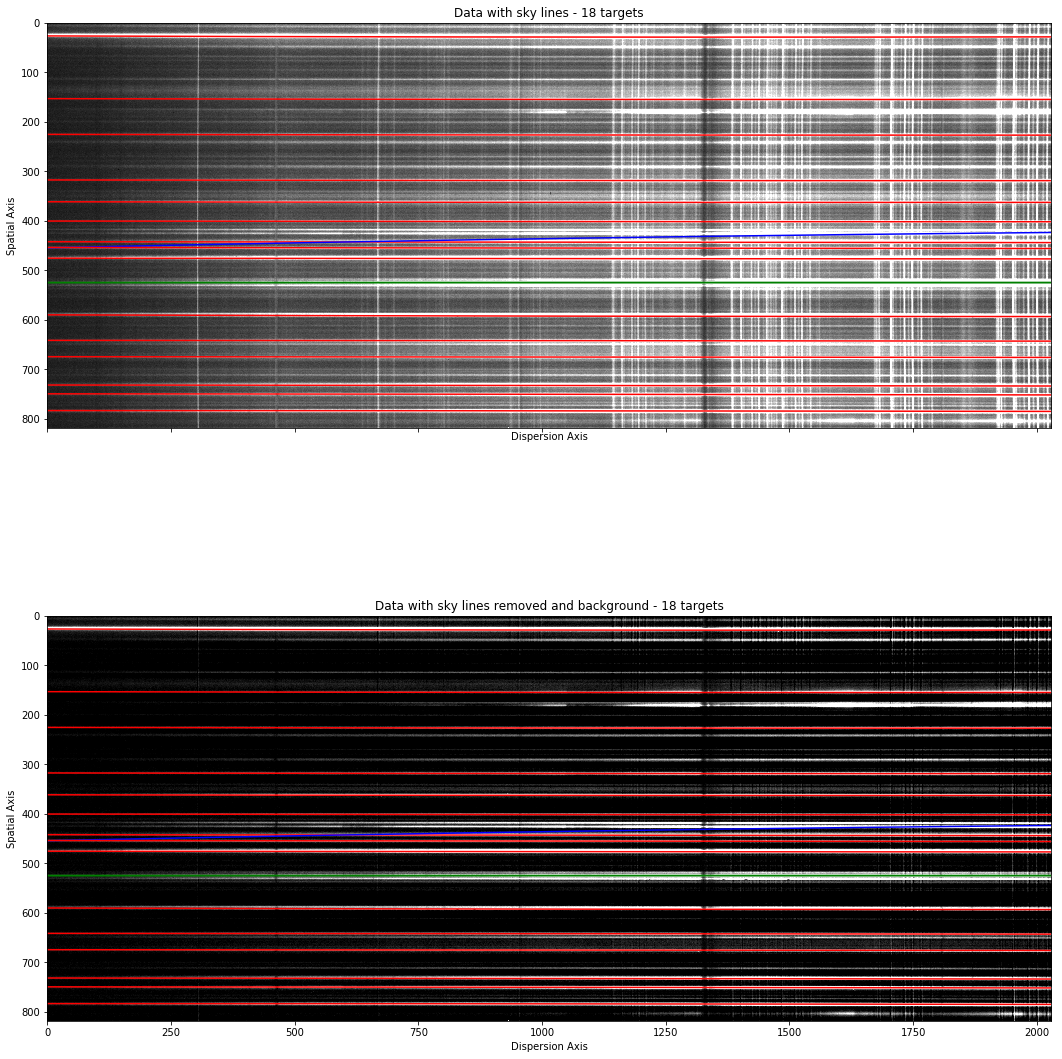

In [34]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(2, 1,sharex=True, figsize=(18, 20))
x,y = ccd.data.shape

ax1.imshow(ccd.data, cmap='gray', clim=(0, 500))
ax1.set_title("Data with sky lines - {} targets".format(len(all_traces)))
ax1.set_xlabel("Dispersion Axis")
ax1.set_ylabel("Spatial Axis")
for trace, profile, info in all_traces:
    if info['GSP_TERR'][0] > 3:
        color_code = 'b'
    elif info['GSP_TERR'][0] == 0.:
        color_code = 'g'
    else:
        color_code = 'r'
    ax1.plot(range(y), trace(range(y)), color=color_code)

ax2.imshow(copy_ccd.data,  cmap='gray', clim=(0, 500))
ax2.set_title("Data with sky lines removed and background - {} targets".format(len(all_traces_cleaned)))
ax2.set_xlabel("Dispersion Axis")
ax2.set_ylabel("Spatial Axis")
for ctrace, profile, info in all_traces_cleaned:
    if info['GSP_TERR'][0] > 3:
        color_code = 'b'
    elif info['GSP_TERR'][0] == 0.:
        color_code = 'g'
    else:
        color_code = 'r'
    
    ax2.plot(range(y), ctrace(range(y)), color=color_code)
plt.show()

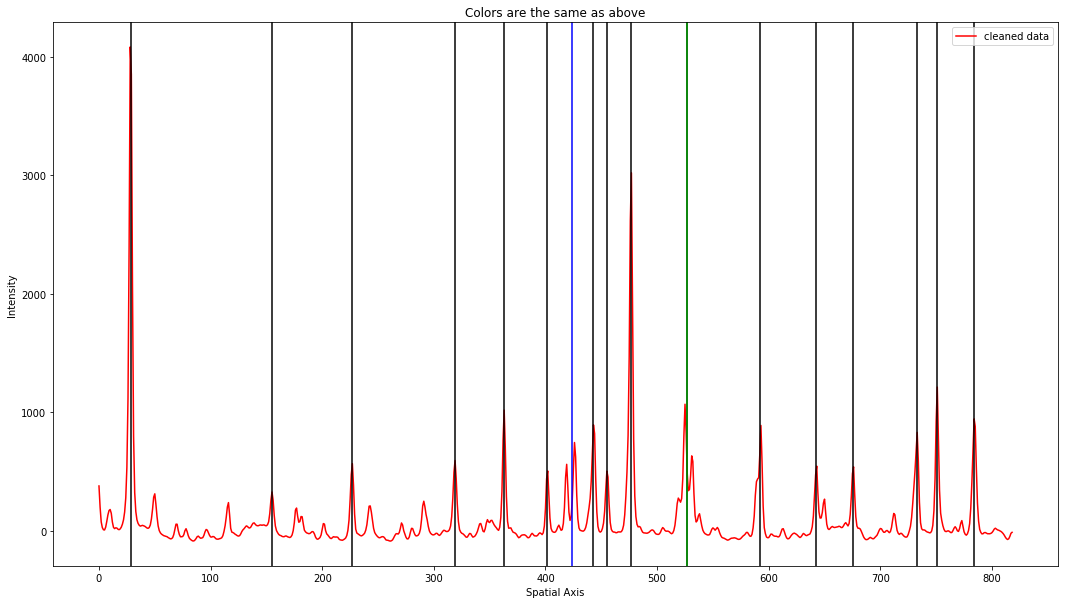

In [35]:
fig, ax = plt.subplots(figsize=(18,10))

ax.plot(cleaned_spatial_median, color='r', label="cleaned data")
ax.set_xlabel("Spatial Axis")
ax.set_ylabel("Intensity")
ax.set_title("Colors are the same as above")
for trace, profile, info in all_traces_cleaned:
    if info['GSP_TERR'][0] > 3:
        color_code = 'b'
    elif info['GSP_TERR'][0] == 0.:
        color_code = 'g'
    else:
        color_code = 'k'
    ax.axvline(profile.mean.value, color=color_code)
ax.legend(loc='best')
plt.show()

# Notes

No real progress, possible tasks

- Trace sky lines curvature (not sure how it would help)
- Do afterwards analysis, such as find trace models "crossing" others
- Estimate average parameters and do sigma clip.

# Attempt to fix 

## Make histogram of trace model parameters

### c0

[1.8098175760009099, 0.8642833506054899, 1.0439595098656582, 1.4121065515508917, 1.2282828086109703, 0.5437277384123718, 0.7137060640133654, 1.492210575673539, 0.42616469755466824, -30.912458550850317, 1.4125502546041844, 1.273268628458709, 1.2264980253030728, 0.8851655679447958, 0.7679603893074045, 1.0893913485672897, 1.0963636590927308, 1.6048567133271092]


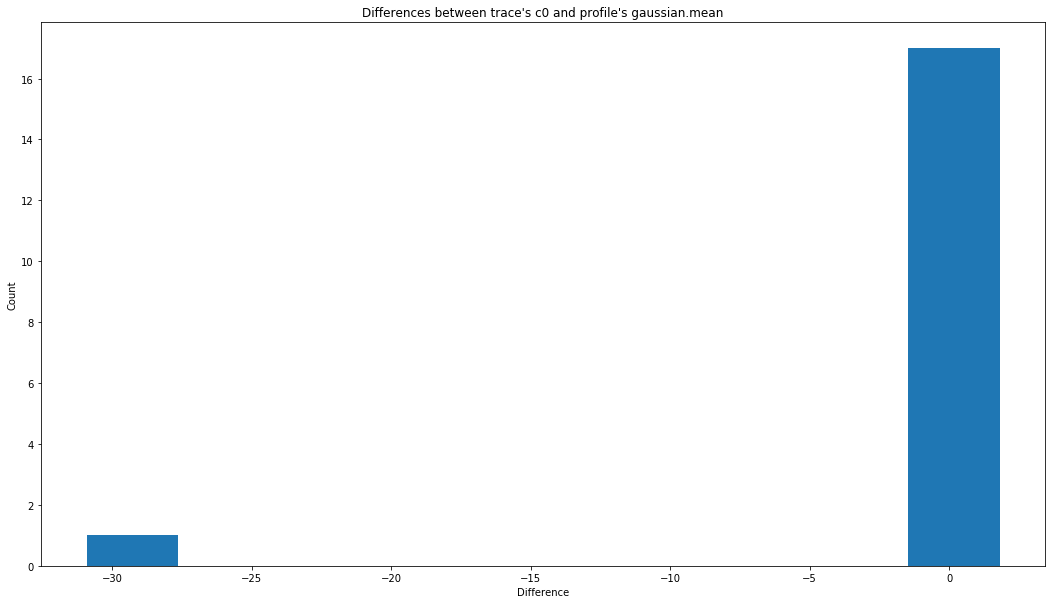

In [36]:
all_c0 = []
all_gaussian_mean = []
differences = [ ]

for trace, profile, _ in all_traces_cleaned:
    all_c0.append(trace.c0.value)
    all_gaussian_mean.append(profile.mean.value)
    differences.append(profile.mean.value - trace.c0.value)
fig, ax = plt.subplots(figsize=(18, 10))
ax.hist(differences)
ax.set_title("Differences between trace's c0 and profile's gaussian.mean")
ax.set_xlabel("Difference")
ax.set_ylabel("Count")
print(differences)



### c1

Text(0, 0.5, 'Count')

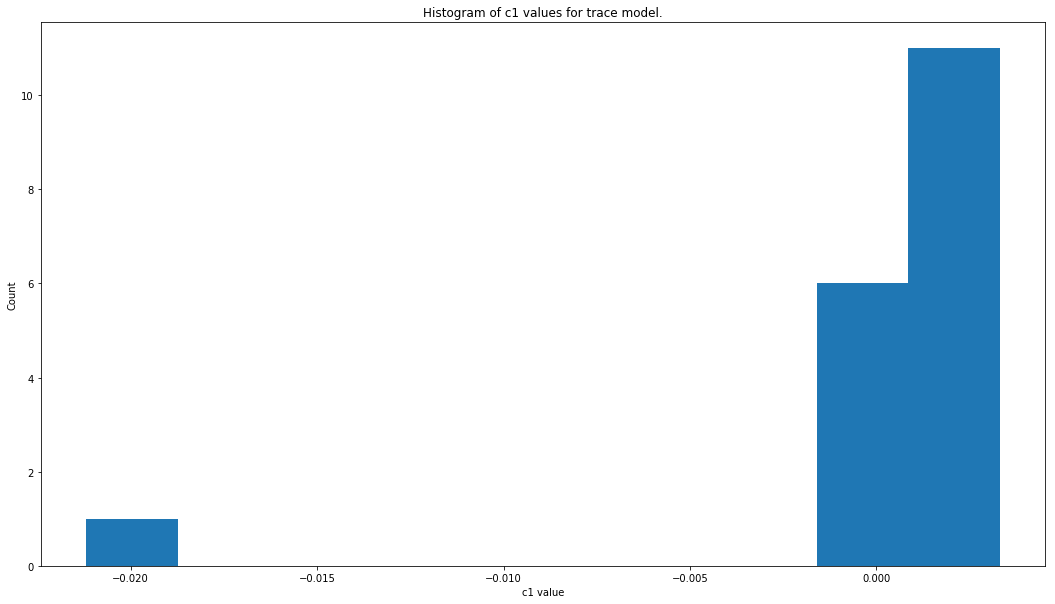

In [37]:
all_c1 = []

for trace, _, _ in all_traces_cleaned:
    all_c1.append(trace.c1.value)
    
fig, ax = plt.subplots(figsize=(18,10))

ax.hist(all_c1)
ax.set_title("Histogram of c1 values for trace model.")
ax.set_xlabel("c1 value")
ax.set_ylabel("Count")

### C2

(array([2., 4., 8., 3., 0., 0., 0., 0., 0., 1.]),
 array([-1.11694915e-06, -7.08891873e-07, -3.00834600e-07,  1.07222673e-07,
         5.15279946e-07,  9.23337219e-07,  1.33139449e-06,  1.73945177e-06,
         2.14750904e-06,  2.55556631e-06,  2.96362358e-06]),
 <a list of 10 Patch objects>)

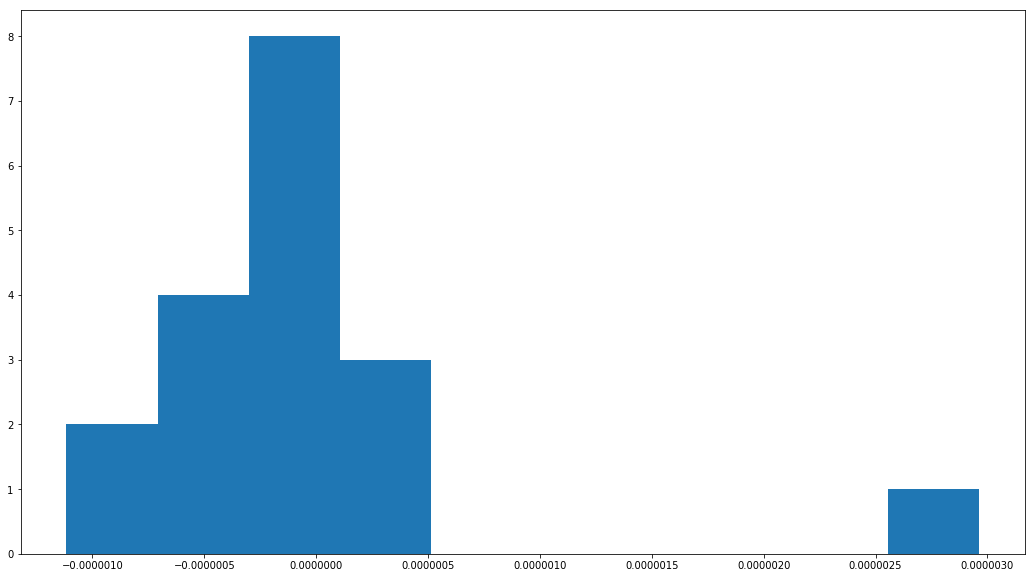

In [38]:
all_c2 = []

for trace, _, _ in all_traces_cleaned:
    all_c2.append(trace.c2.value)
    
fig, ax = plt.subplots(figsize=(18,10))

ax.hist(all_c2)

## Histogram of RMS Error for trace

(array([16.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.34370789, 0.68741578, 1.03112367, 1.37483156,
        1.71853944, 2.06224733, 2.40595522, 2.74966311, 3.093371  ,
        3.43707889]),
 <a list of 10 Patch objects>)

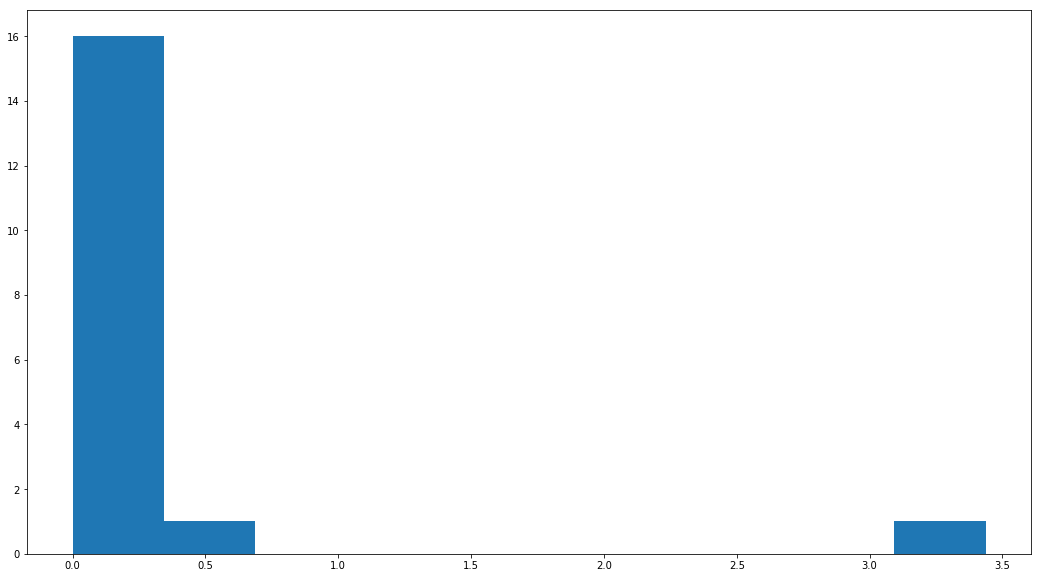

In [39]:
all_rms = []
for _, _, info in all_traces_cleaned:
    all_rms.append(info['GSP_TERR'][0])
    
fig, ax = plt.subplots(figsize=(18, 10))

ax.hist(all_rms)

In [40]:
problematic_trace = None
for trace, profile, info in all_traces_cleaned:
    if info['GSP_TERR'][0] > 3:
        problematic_trace = trace
        print(Fore.RED + "c0 = {:06.2f} c1 = {: .5f} c2 = {: .3E} Center = {:06.2f} RMS = {:.4f}".format(trace.c0.value, 
                                                                                trace.c1.value,
                                                                                trace.c2.value, 
                                                                                profile.mean.value, 
                                                                                trace_info['GSP_TERR'][0]))

c0 = 454.52 c1 = -0.02119 c2 =  2.964E-06 Center = 423.61 RMS = 0.2088


(500, 350)

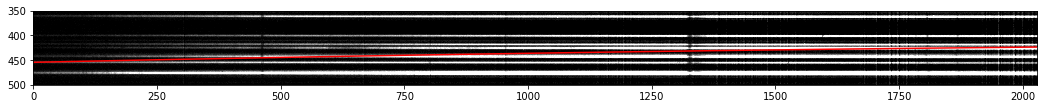

In [41]:
fig, ax = plt.subplots(figsize=(18, 200))
ax.imshow(copy_ccd.data, cmap='gray', clim=(0,500))
ax.plot(range(copy_ccd.data.shape[1]), problematic_trace(range(copy_ccd.data.shape[1])), color='r')
ax.set_ylim(500, 350)

In [42]:
import numpy as np

print(np.median(differences), np.median(all_c1), np.median(all_c2))

1.0928775038300103 0.0010538499055247341 -9.102561942194634e-08


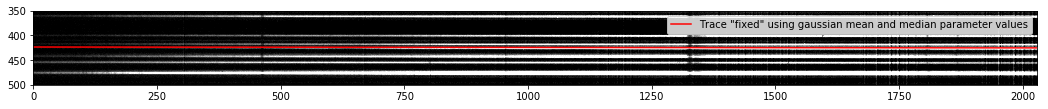

In [44]:
problematic_trace.c0.value = 423.61
problematic_trace.c1.value = np.median(all_c1)
problematic_trace.c2.value = np.median(all_c2)

fig, ax = plt.subplots(figsize=(18, 200))
ax.imshow(copy_ccd.data, cmap='gray', clim=(0,500))
ax.plot(range(copy_ccd.data.shape[1]), problematic_trace(range(copy_ccd.data.shape[1])), color='r', label='Trace \"fixed\" using gaussian mean and median parameter values')
ax.set_ylim(500, 350)
ax.legend(loc='best')


# Conclusion

Should be possible clean and even fix problematic traces, in the future it even might be possible to have good guessed traces for very faint targets.

One of the remaining problems is source deblending and potentially the background subtraction.

## Other things that could/~~should~~ be implemented

- Trace space axis curvature.
